In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Loading the image

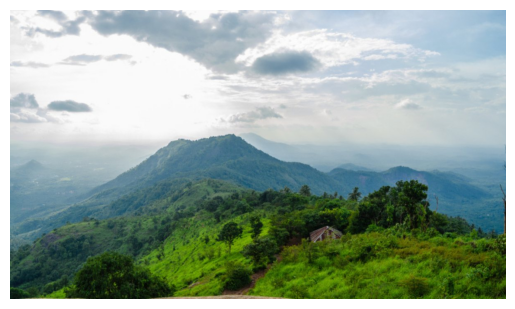

In [2]:
image_path = '/content/k2.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
plt.axis('off')
plt.show()

# Add Noise to the Image
here we use salt and pepper noise
 * Salt-and-pepper noise: Appears as random black (pepper) and white (salt) spikes within the image. It is usually caused by sharp and sudden disturbances in the image signal.

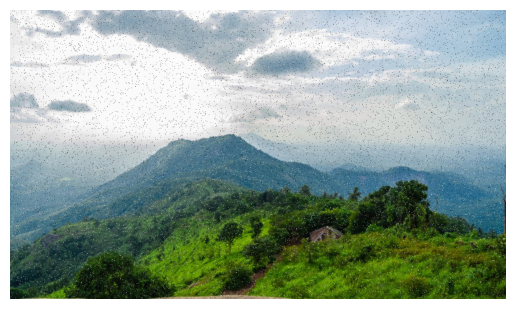

In [3]:
def add_salt_pepper_noise(image, amount=0.005, s_vs_p=0.5):
    out = np.copy(image)

    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords[0], coords[1], :] = 255

    num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords[0], coords[1], :] = 0

    return out

noisy_image = add_salt_pepper_noise(original_image, amount=0.01, s_vs_p=0.5)

plt.imshow(noisy_image)
plt.axis('off')
plt.show()


# Median filter to remove noise
* The median filter is a technique, commonly used to remove noise from images or other signals. The primary advantage of the median filter lies in its ability to remove noise while preserving edges, making it particularly effective against salt-and-pepper noise.
* The median filter operates by moving through the image pixel by pixel, replacing each value with the median value of neighbouring pixels. The size of the neighbourhood is determined by a user-defined parameter (kernel size).

In [4]:
filtered_image = cv2.medianBlur(noisy_image, 3)

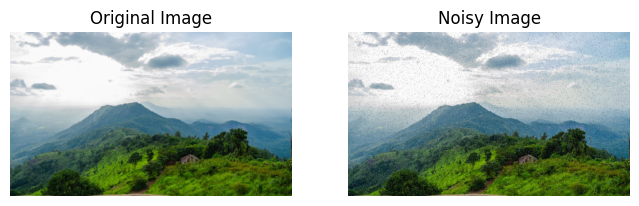

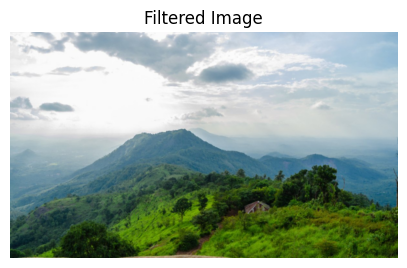

In [5]:
plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(filtered_image)
plt.title('Filtered Image')
plt.axis('off')
plt.show()